# Exploratory Data Analysis #

## Set up imports for Pandas, Matplotlib, and MySQL Connector ##

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector as connection
from sklearn.linear_model import LinearRegression

## Use MySQL Connector to establish a connection to my remote data source ##

In [188]:
myremotedb = connection.connect(host = "devcodecamp-mysql.c5p7yvjq1h8y.us-east-2.rds.amazonaws.com", database = "salesdb", user = "root", password = "D3v$tudent", use_pure = True)

## Query **salesdb** to JOIN the information from the *sales* and *cities* tables and save as a single data frame ##

In [189]:
joinquery = """SELECT sales.Invoice_ID,
                    sales.Customer_Type,
                    sales.Gender,
                    sales.Product_Line,
                    sales.Unit_Price,
                    sales.Quantity,
                    sales.Sales_Tax,
                    sales.Total,
                    sales.Date,
                    sales.Time,
                    sales.Payment,
                    sales.COGS,
                    sales.Gross_Income,
                    sales.rating,
                    cities.City
                    FROM sales 
                    JOIN cities 
                    ON sales.City_ID = cities.City_ID """
joined_df = pd.read_sql_query(joinquery, myremotedb)
joined_df.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_22108\2112312959.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  joined_df = pd.read_sql_query(joinquery, myremotedb)


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,rating,City
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,7.0,Seattle
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,4.9,Milwaukee
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,6.1,Milwaukee
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,4.2,Milwaukee
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,6.6,Seattle


## Perform necessary data cleaning and wrangling steps on Joined DataFrame ##

* Explore all the `values` within all the `columns` of the new *Joined DataFrame* 

In [190]:
joined_df["Rating"] = joined_df["rating"]
dropped_rating_df = joined_df.drop("rating", axis = 1)
dropped_rating_df.head()


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Sales_Tax,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,None,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,None,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,None,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,None,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,None,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,Seattle,6.6


* Check for/drop null `values` from *Joined DataFrame* 

In [191]:

no_null_df = dropped_rating_df.drop("Sales_Tax", axis = 1)

no_null_df.head ()


,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,3/13/2019,19:44,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,1/17/2019,12:36,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,3/20/2019,17:52,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,3/5/2019,18:02,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2/27/2019,12:22,Ewallet,42.96,2.1480,Seattle,6.6


`Sales_Tax column removed`

* Check for duplicate `rows` from the *No Null DataFrame*

In [192]:
no_null_df.duplicated().sort_values()



0      False
658    False
659    False
660    False
661    False
       ...  
339    False
340    False
341    False
328    False
999    False
Length: 1000, dtype: bool

`No duplicate rows to delete`

* Convert any necessary `values` to *Panda DateTime* format within `columns` of the *No Null DataFrame*

In [193]:
no_null_df["Date"] = pd.to_datetime(no_null_df["Date"])
no_null_df["Time"] = pd.to_datetime(no_null_df["Time"])
no_null_df.head()

,Invoice_ID,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Total,Date,Time,Payment,COGS,Gross_Income,City,Rating
0,101-17-6199,Normal,Male,Food and beverages,45.79,7,336.5565,2019-03-13,2023-02-10 19:44:00,Credit card,320.53,16.0265,Seattle,7.0
1,101-81-4070,Member,Female,Health and beauty,62.82,2,131.9220,2019-01-17,2023-02-10 12:36:00,Ewallet,125.64,6.2820,Milwaukee,4.9
2,102-06-2002,Member,Male,Sports and travel,25.25,5,132.5625,2019-03-20,2023-02-10 17:52:00,Cash,126.25,6.3125,Milwaukee,6.1
3,102-77-2261,Member,Male,Health and beauty,65.31,7,480.0285,2019-03-05,2023-02-10 18:02:00,Credit card,457.17,22.8585,Milwaukee,4.2
4,105-10-6182,Member,Male,Fashion accessories,21.48,2,45.1080,2019-02-27,2023-02-10 12:22:00,Ewallet,42.96,2.1480,Seattle,6.6


`Date and Time columns converted to Panda DateTime format`

#### Create a `variable` that represents the final filtered *DataFrame*

In [194]:
clean_df = no_null_df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Invoice_ID     1000 non-null   object        
 1   Customer_Type  1000 non-null   object        
 2   Gender         1000 non-null   object        
 3   Product_Line   1000 non-null   object        
 4   Unit_Price     1000 non-null   float64       
 5   Quantity       1000 non-null   int64         
 6   Total          1000 non-null   float64       
 7   Date           1000 non-null   datetime64[ns]
 8   Time           1000 non-null   datetime64[ns]
 9   Payment        1000 non-null   object        
 10  COGS           1000 non-null   float64       
 11  Gross_Income   1000 non-null   float64       
 12  City           1000 non-null   object        
 13  Rating         1000 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 109.5

## Examine the Spread of `values` across `columns` within `Filtered DataFrame` ##

* How many sales were made for members vs. normal customers

In [195]:
customer_type_sales_frequency = clean_df["Customer_Type"].value_counts()
customer_type_sales_frequency
# customer_type_sales_frequency_query = " SELECT Customer_Type, COUNT(Customer_Type) AS Customer_Transaction_Count FROM sales GROUP BY Customer_Type ORDER BY Customer_Type"
# customer_type_sales_frequency_df = pd.read_sql_query(customer_type_sales_frequency_query, myremotedb)
# customer_type_sales_frequency_df



Member    501
Normal    499
Name: Customer_Type, dtype: int64

* How many sales were made at each store location

In [196]:
sale_transaction_amount_per_location = clean_df["City"].value_counts()
sale_transaction_amount_per_location

# sale_transaction_amount_per_location_query = " SELECT City, COUNT(City) AS Sale_Transactions_Per_City FROM city_saledbcity_saledb GROUP BY City ORDER BY City DESC"
# sale_transaction_amount_per_location_df = pd.read_sql_query(sale_transaction_amount_per_location_query, myremotedb)
# sale_transaction_amount_per_location_df

Seattle          340
New York City    332
Milwaukee        328
Name: City, dtype: int64

* How many sales were made for each product line

In [197]:
amount_sold_per_product = clean_df["Product_Line"].value_counts()
amount_sold_per_product

# amount_sold_per_product_query = " SELECT Product_Line, COUNT(Product_line) AS Product_Line_Count FROM sales GROUP BY Product_Line ORDER BY Product_LIne_Count DESC"
# amount_sold_per_product_df = pd.read_sql_query(amount_sold_per_product_query, myremotedb)
# amount_sold_per_product_df

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product_Line, dtype: int64

* What is the overall average rating, based on all sales records

In [198]:
overall_rating_average = clean_df["Rating"].mean()
overall_rating_average

# overall_rating_average_query = " SELECT AVG(Rating) as Overall_Ratings_Average FROM sales "
# overall_rating_average_df = pd.read_sql_query(overall_rating_average_query, myremotedb)
# overall_rating_average_df

6.9727

## Create three visualizations of the `DataFrame` to better understand any trends or patterns within the data set with each containing a **chart  title** / **X-axis label** / **Y-axis label** ##

* Create a **BAR** chart to show the `Individual Product Count` per `City`

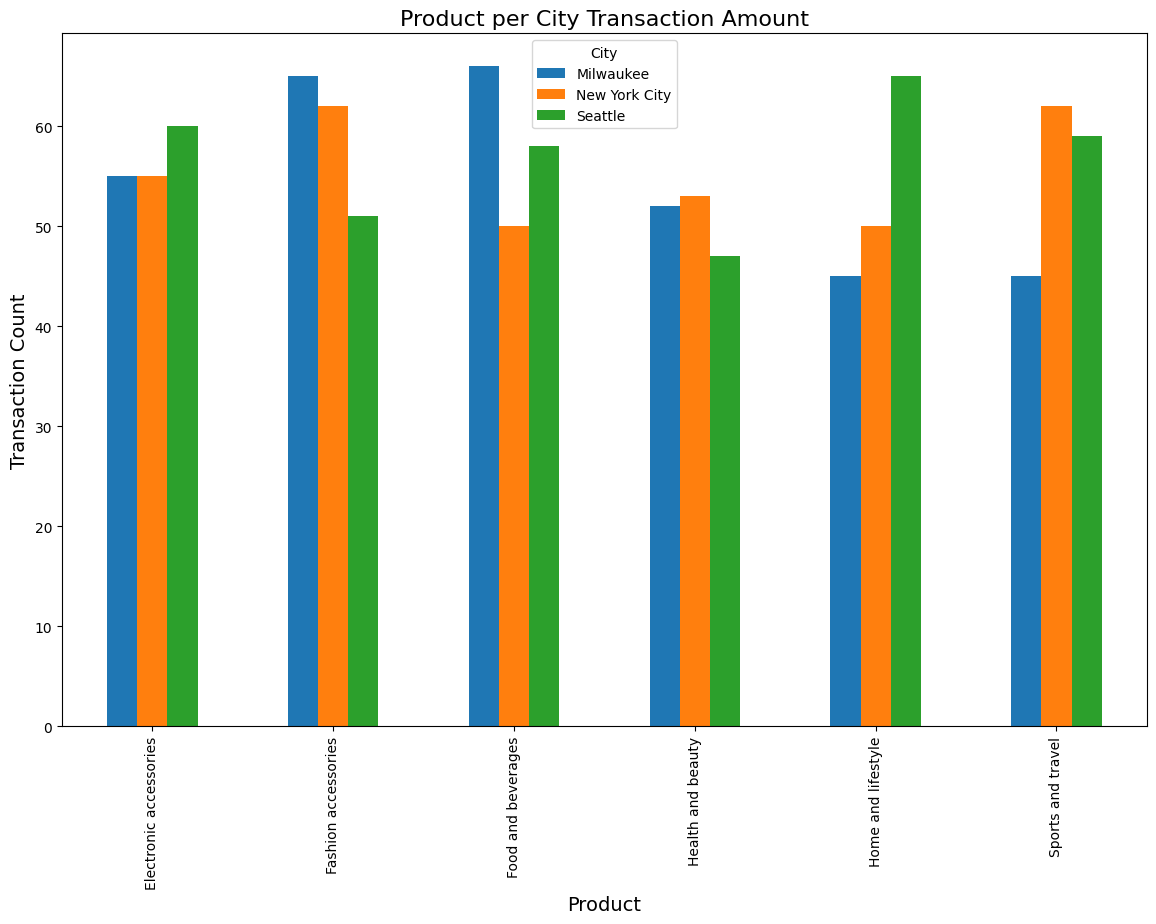

In [199]:
cities = clean_df[(clean_df["City"] == "Seattle") | (clean_df["City"] == "New York City") | (clean_df["City"] == "Milwaukee")]
cities.groupby(["Product_Line", "City"]).size().unstack().plot.bar(figsize = (14,9));
plt.title("Product per City Transaction Amount", fontsize = 16)
plt.xlabel("Product", fontsize = 14);
plt.ylabel("Transaction Count", fontsize = 14);

* Plot a **BOX** chart representing the `Gross Income` of the `Products Sold`

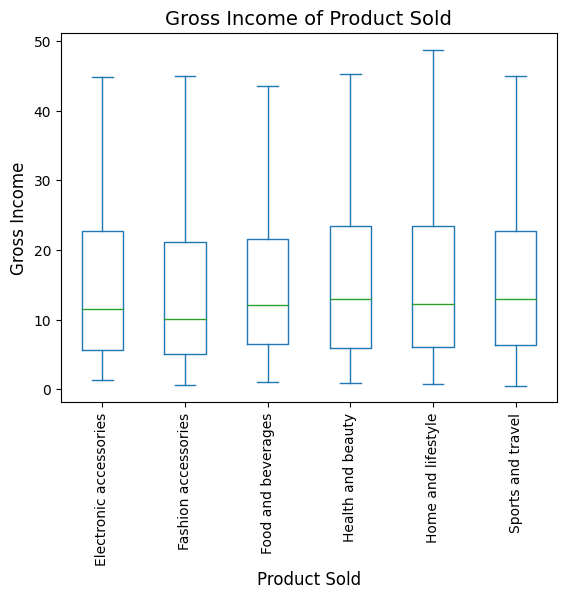

In [200]:
clean_df.plot(kind = "box", column = ["Gross_Income"], by = "Product_Line", showfliers = False)
plt.xticks(rotation = "vertical")
plt.title("Gross Income of Product Sold", fontsize = 14)
plt.xlabel("Product Sold", fontsize = 12)
plt.ylabel("Gross Income", fontsize = 12);

* Plot a **SCATTER** chart to show the correlation between the `Cost of Goods` and `Gross Sales`

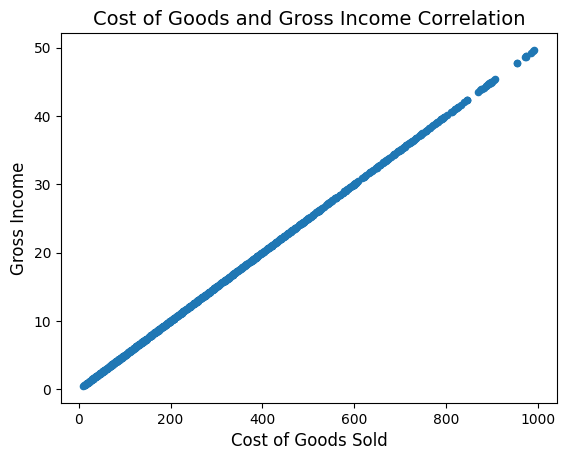

In [208]:
clean_df.plot.scatter(x="COGS", y = "Gross_Income")
plt.title("Cost of Goods and Gross Income Correlation", fontsize = 14)
plt.xlabel("Cost of Goods Sold", fontsize = 12)
plt.ylabel("Gross Income", fontsize = 12);

* Describe numeric `trends` in the **DataFrame**

In [202]:
clean_df.describe()

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000
mean,55.672130,5.510000,322.966749,307.58738,15.379369,6.97270
std,26.494628,2.923431,245.885335,234.17651,11.708825,1.71858
min,10.080000,1.000000,10.678500,10.17000,0.508500,4.00000
25%,32.875000,3.000000,124.422375,118.49750,5.924875,5.50000
50%,55.230000,5.000000,253.848000,241.76000,12.088000,7.00000
75%,77.935000,8.000000,471.350250,448.90500,22.445250,8.50000
max,99.960000,10.000000,1042.650000,993.00000,49.650000,10.00000


* Explore the `correlation` between columns of the **Data Set**

In [203]:
clean_df.corr(numeric_only= True)

,Unit_Price,Quantity,Total,COGS,Gross_Income,Rating
Unit_Price,1.000000,0.010778,0.633962,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,-0.015815
Total,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
COGS,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Gross_Income,0.633962,0.705510,1.000000,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,1.000000


* Note the columns with the ***strongest*** correlation and visualize those two columns using a ***Matplotlib Scatter Plot*** ensuring that all labels are present

* Reshape my two `Columns` to prepare for fitting to a **Linear Regression Model**

In [204]:
reshaped_x = clean_df[["Unit_Price"]]
reshaped_y = clean_df["Gross_Income"]

* Create a *new* LinearRegression `instance` and a predictive model for my Y-axis values

In [205]:
model = LinearRegression()
model.fit(reshaped_x,reshaped_y)
predicted_yaxis_values = model.predict(reshaped_x)

* Create a visualization of my `predictive model` with labeling and distinct line color

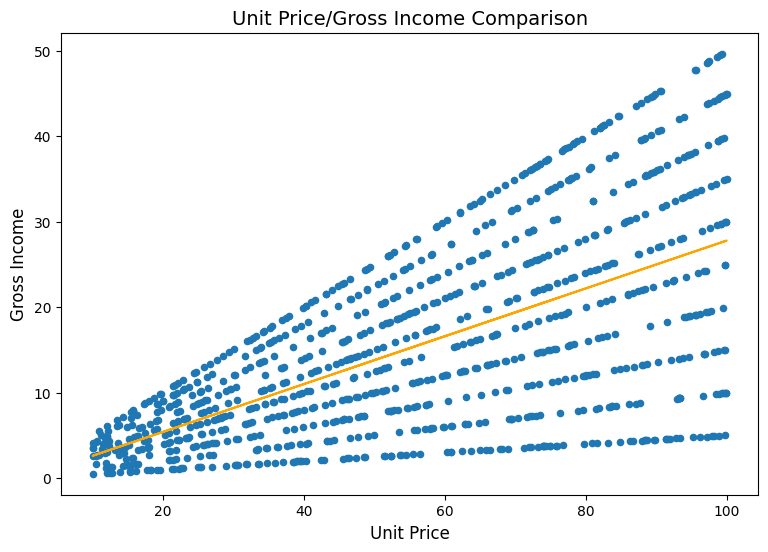

In [207]:
clean_df.plot.scatter(x="Unit_Price",y="Gross_Income",figsize=(9,6))
plt.title("Unit Price/Gross Income Comparison", fontsize = 14)
plt.xlabel("Unit Price", fontsize = 12)
plt.ylabel("Gross Income", fontsize = 12)
plt.plot(reshaped_x, predicted_yaxis_values, color= "orange");